In [ ]:
pip install numpy

In [ ]:
pip install pandas

In [ ]:
pip install matplotlib 

In [ ]:
pip install seaborn 

In [ ]:
pip install plotly

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [27]:
# # load

USA_unemployment = pd.read_csv('/workspace/Unemployment-analysis-2010-2020-/datasets/unemployment_data_us.csv',parse_dates=['Date'],date_format="%b-%Y")
state_unempolyment = pd.read_csv('/workspace/Unemployment-analysis-2010-2020-/datasets/unemployment_data_us_state.csv')


# print first few rows
USA_unempolyment.head()

,Year,Month,Primary_School,Date,High_School,Associates_Degree,Professional_Degree,White,Black,Asian,Hispanic,Men,Women,Unemployment_Rate
0,2010,Jan,15.3,2010-01-01,10.2,8.6,4.9,8.8,16.5,8.3,12.9,10.2,7.9,11.625
1,2011,Jan,14.3,2011-01-01,9.5,8.1,4.3,8.1,15.8,6.8,12.3,9.0,7.9,10.750
2,2012,Jan,13.0,2012-01-01,8.5,7.1,4.3,7.4,13.6,6.7,10.7,7.7,7.6,9.600
3,2013,Jan,12.0,2013-01-01,8.1,6.9,3.8,7.1,13.7,6.4,9.7,7.5,7.2,9.225
4,2014,Jan,9.4,2014-01-01,6.5,5.9,3.3,5.7,12.1,4.7,8.3,6.2,5.8,7.700


In [28]:
print(USA_unempolyment.columns)


Index(['Year', 'Month', 'Primary_School', 'Date', 'High_School',
       'Associates_Degree', 'Professional_Degree', 'White', 'Black', 'Asian',
       'Hispanic', 'Men', 'Women', 'Unemployment_Rate'],
      dtype='object')


In [29]:
# Check for missing values
print("\nMissing values in USA_unemployment dataset:")
print(USA_unempolyment.isnull().sum())


Missing values in USA_unemployment dataset:
Year                   0
Month                  0
Primary_School         9
Date                   0
High_School            9
Associates_Degree      9
Professional_Degree    9
White                  9
Black                  9
Asian                  9
Hispanic               9
Men                    9
Women                  9
Unemployment_Rate      9
dtype: int64


In [30]:
year_ethnicity = USA_unempolyment.groupby('Year').agg(
    # Calculating the mean unemployment rate for the 'White' ethnic group for each year
    white_mean = ('White', 'mean'),
    # Calculating the mean unemployment rate for the 'Black' ethnic group for each year
    black_mean = ('Black', 'mean'),
    # Calculating the mean unemployment rate for the 'Asian' ethnic group for each year
    asian_mean = ('Asian', 'mean'),
    # Calculating the mean unemployment rate for the 'Hispanic' ethnic group for each year
    hispanic_mean = ('Hispanic', 'mean')
).round(decimals=2)  # Rounding the mean values to 2 decimal places

# Displaying the results
print(year_ethnicity)


      white_mean  black_mean  asian_mean  hispanic_mean
Year                                                   
2010        8.72       15.96        7.50          12.49
2011        7.93       15.82        7.02          11.49
2012        7.19       13.82        5.90          10.32
2013        6.51       13.07        5.22           9.11
2014        5.30       11.34        4.98           7.40
2015        4.58        9.56        3.82           6.60
2016        4.28        8.43        3.64           5.78
2017        3.81        7.48        3.40           5.13
2018        3.46        6.49        3.00           4.68
2019        3.28        6.08        2.68           4.30
2020        3.40        6.17        3.20           4.90


In [31]:
# what year has the highest unempolyment month and year ?

# Calculate the overall unemployment rate based on  demographic 
USA_unempolyment['Unemployment_Rate'] =USA_unempolyment[['White', 'Black', 'Asian', 'Hispanic']].mean(axis=1)

# Find the row with the highest unemployment rate
max_unemployment_row = USA_unempolyment.loc[USA_unempolyment['Unemployment_Rate'].idxmax()]

year_month_max_unemployment = f"{max_unemployment_row['Year']} - {max_unemployment_row['Month']}"

# Print the result
print(f"The year and month with the highest unemployment rate is: {year_month_max_unemployment}")


The year and month with the highest unemployment rate is: 2010 - Jan


In [32]:
# what year and month has the least unempolyment

# Calculate the overall unemployment rate based on demographic 
USA_unempolyment['Unemployment_Rate'] = USA_unempolyment[['White', 'Black', 'Asian', 'Hispanic']].mean(axis=1)

# Find the row with the least unemployment rate
min_unemployment_row = USA_unempolyment.loc[USA_unempolyment['Unemployment_Rate'].idxmin()]

# Extract the year and month from the index (which is the Year-Month combination)
year_month_min_unemployment = f"{min_unemployment_row['Year']} - {min_unemployment_row['Month']}"

# Print the result
print(f"The year and month with the least unemployment rate is: {year_month_min_unemployment}")


The year and month with the least unemployment rate is: 2019 - Sep


In [33]:
# what does the umpolyment have to do with the educational background they had?

# Define educational background levels
education_levels = ['Primary_School', 'High_School', 'Associates_Degree', 'Professional_Degree']

# Calculate mean unemployment rates by educational background
mean_unemployment_by_education = {}
for level in education_levels:
    mean_unemployment_by_education[level] = USA_unempolyment[level].mean()

# Print mean unemployment rates by educational background as percentages
for level, mean_unemployment in mean_unemployment_by_education.items():
    print(f"{level.replace('_', ' ').title()}: {mean_unemployment:.2f}%")



Primary School: 9.33%
High School: 6.39%
Associates Degree: 5.34%
Professional Degree: 3.13%


In [34]:
# what race had the least and highest unepolyemnt rate?

# Calculate the overall unemployment rate based on race
USA_unempolyment['Unemployment_Rate'] = USA_unempolyment[['White', 'Black', 'Asian', 'Hispanic']].mean(axis=1)

# Find the race with the highest unemployment rate
highest_unemployment_race = USA_unempolyment[['White', 'Black', 'Asian', 'Hispanic']].max().idxmax()
highest_unemployment_rate = USA_unempolyment[['White', 'Black', 'Asian', 'Hispanic']].max().max()

# Find the race with the lowest unemployment rate
lowest_unemployment_race = USA_unempolyment[['White', 'Black', 'Asian', 'Hispanic']].min().idxmin()
lowest_unemployment_rate = USA_unempolyment[['White', 'Black', 'Asian', 'Hispanic']].min().min()

# Print the results
print(f"The race with the highest unemployment rate is {highest_unemployment_race} with {highest_unemployment_rate:.2f}%")
print(f"The race with the lowest unemployment rate is {lowest_unemployment_race} with {lowest_unemployment_rate:.2f}%")


The race with the highest unemployment rate is Black with 16.80%
The race with the lowest unemployment rate is Asian with 2.10%


In [35]:
# how does gender play in the unempolment rate?

# Calculate the overall unemployment rate based on ace
USA_unempolyment['Unemployment_Rate'] =USA_unempolyment[['White', 'Black', 'Asian', 'Hispanic']].mean(axis=1)

# Calculate mean unemployment rates by gender
mean_unemployment_men = USA_unempolyment['Men'].mean()
mean_unemployment_women = USA_unempolyment['Women'].mean()

# Print the results
print(f"Mean Unemployment Rate for Men: {mean_unemployment_men:.2f}%")
print(f"Mean Unemployment Rate for Women: {mean_unemployment_women:.2f}%")


Mean Unemployment Rate for Men: 5.85%
Mean Unemployment Rate for Women: 5.49%


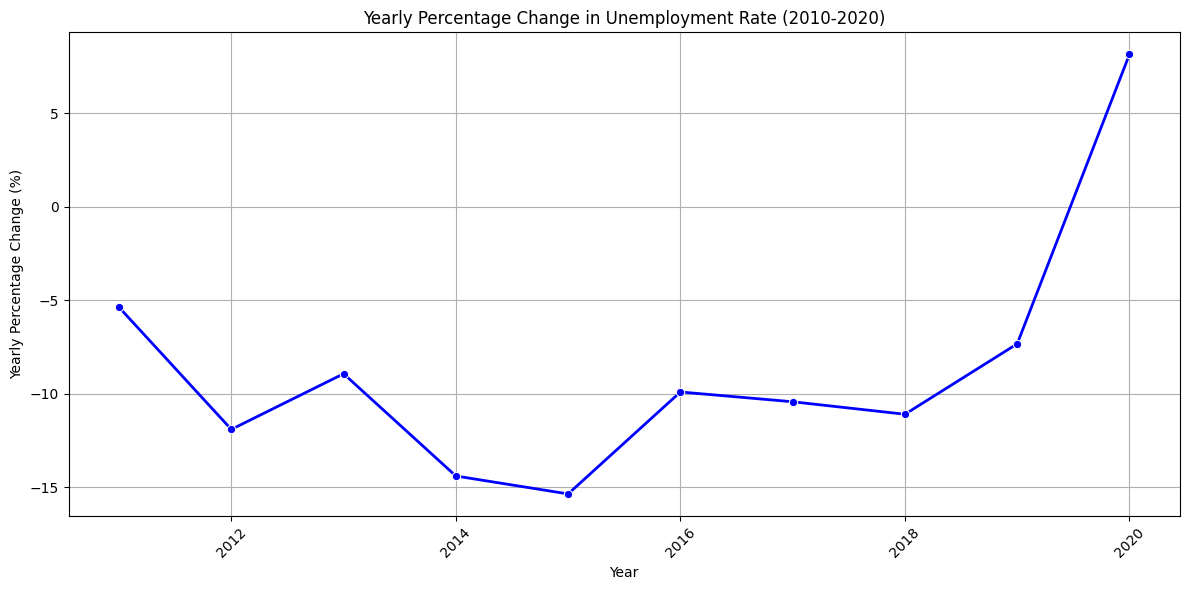

In [36]:
# How did unemployment rates change year by year?

# Filter data for years 2010 to 2020
USA_unemployment_2010_2020 = USA_unempolyment[(USA_unempolyment['Year'] >= 2010) & (USA_unempolyment['Year'] <= 2020)]

# Group by 'Year' and calculate unemployment rate for each year
yearly_unemployment = USA_unemployment_2010_2020.groupby('Year')['Unemployment_Rate'].mean().reset_index()

# Calculate yearly percentage change
yearly_unemployment['Yearly_Percentage_Change'] = yearly_unemployment['Unemployment_Rate'].pct_change() * 100

# Plotting the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_unemployment, x='Year', y='Yearly_Percentage_Change', marker='o', color='b', linewidth=2)
plt.title('Yearly Percentage Change in Unemployment Rate (2010-2020)')
plt.xlabel('Year')
plt.ylabel('Yearly Percentage Change (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The state with the highest unemployment rate is Puerto Rico with 6.70%
The state with the lowest unemployment rate is Hawaii with 2.67%


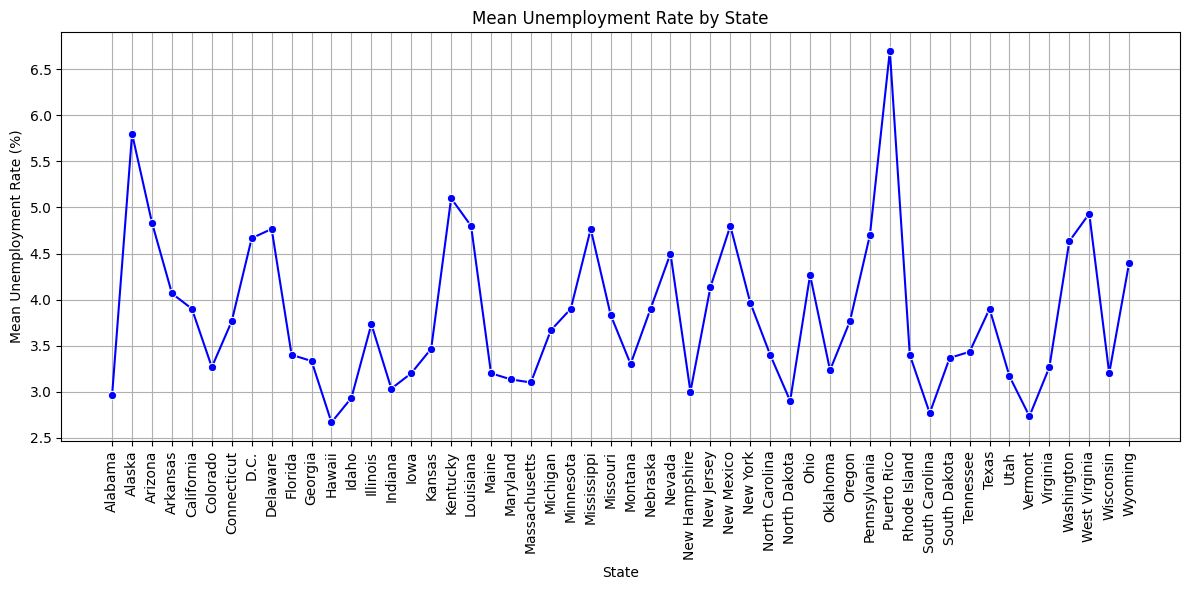

In [37]:
# How did unemployment rates vary by region (e.g., state, urban vs. rural)?

# Calculate mean unemployment rate by state
state_mean_unemployment = state_unempolyment.groupby('State')['Unemployment_Rate'].mean().reset_index()

# Find the state with the highest unemployment rate
highest_unemployment_state = state_mean_unemployment.loc[state_mean_unemployment['Unemployment_Rate'].idxmax()]

# Find the state with the lowest unemployment rate
lowest_unemployment_state = state_mean_unemployment.loc[state_mean_unemployment['Unemployment_Rate'].idxmin()]

# Print the results
print(f"The state with the highest unemployment rate is {highest_unemployment_state['State']} "
      f"with {highest_unemployment_state['Unemployment_Rate']:.2f}%")
print(f"The state with the lowest unemployment rate is {lowest_unemployment_state['State']} "
      f"with {lowest_unemployment_state['Unemployment_Rate']:.2f}%")

# Visualize mean unemployment rates by state
plt.figure(figsize=(12, 6))
sns.lineplot(data=state_mean_unemployment, x='State', y='Unemployment_Rate', marker='o', color='blue')
plt.title('Mean Unemployment Rate by State')
plt.xlabel('State')
plt.ylabel('Mean Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


## <h1 style="text-align: center;">Conclusion</h1>
<p style="font-size: 16px;">
In my analysis of unemployment rates from 2010 to 2020, several key findings emerged that highlight significant trends across demographics and regions. The year 2010, particularly January, stood out with the highest unemployment rate observed throughout the decade. Conversely, September 2019 marked the period with the lowest unemployment rate, indicating a noteworthy improvement over time. When examining educational backgrounds, individuals with Primary School education showed the highest unemployment rate at 9.33%, whereas those with Professional Degrees reported the lowest rate at 3.13%. These figures underscore the influence of education on employment outcomes. Analyzing by race revealed disparities, with Black individuals experiencing the highest unemployment rate at 16.80%, while Asians reported the lowest at 2.10%. Gender differences in unemployment rates were also observed, with men averaging 5.85% and women 5.49%. </p>
<p style="font-size: 16px;">
Yearly trends in unemployment rates varied, reflecting economic fluctuations and policy impacts. Puerto Rico consistently reported the highest state-level unemployment rate at 6.70%, contrasting with Hawaii's consistently low rate of 2.67%.</p></p>
<p style="font-size: 16px;">
These findings highlight the intricate relationship between education, race, gender, and regional factors in shaping unemployment outcomes. They underscore the ongoing challenges faced by specific demographic groups and regions, emphasizing the potential role of education in mitigating unemployment risks.</p>
<p style="font-size: 16px;">
Looking ahead, further research could delve deeper into the root causes behind these disparities and explore targeted policies to foster inclusive economic growth. Such efforts are essential for promoting equitable opportunities and resilience in our economy.</p>
<p style="font-size: 16px;">
In conclusion, this study offers valuable insights into the dynamics of unemployment over the past decade. It underscores the importance of tailored approaches in policymaking and interventions to address unemployment disparities.
</p>
